In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

## Load dataset
cars = pd.read_csv('car_price_prediction.csv')
cars.head(20)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [ ]:
cars.shape

(19237, 18)

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
cars.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [ ]:
cars.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [ ]:
## check th unique values for each column
for i in cars.columns:
  print(i + ' -', cars[i].nunique())

ID - 18924
Price - 2315
Levy - 559
Manufacturer - 65
Model - 1590
Prod. year - 54
Category - 11
Leather interior - 2
Fuel type - 7
Engine volume - 107
Mileage - 7687
Cylinders - 13
Gear box type - 4
Drive wheels - 3
Doors - 3
Wheel - 2
Color - 16
Airbags - 17


In [ ]:
## check for missing values
print(cars.isnull().sum())

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


In [ ]:
## checking for and removing duplicates if any
cars.duplicated().sum()

313

In [ ]:
cars = cars.drop_duplicates()

In [ ]:
cars.shape

(18924, 18)

In [ ]:
cars.duplicated().sum()

0

Performing further data cleaning on columns with null/missing values and any form of inconsistencies

In [ ]:
## replace the _ in the Levy column with 0
cars['Levy'] = cars['Levy'].str.replace('-','0')
cars['Levy'] = cars['Levy'].astype('int64')

<ipython-input-12-9bce7c0d2ef6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['Levy'] = cars['Levy'].str.replace('-','0')
<ipython-input-12-9bce7c0d2ef6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['Levy'] = cars['Levy'].astype('int64')


In [ ]:
## remove the km in the mileage column and change it to an integer
cars['Mileage'] = cars['Mileage'].str.replace('km', '').astype('int64')

In [ ]:
## change all records in the model column to uppercase for consistency
cars['Model'] = cars['Model'].str.upper()

In [ ]:
## create a new column(Car_age) from the Prod year column
from datetime import datetime
cars['Car_age'] = datetime.now().year - cars['Prod. year']

In [ ]:
cars.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car_age
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,14
1,44731507,16621,1018,CHEVROLET,EQUINOX,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,13
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,18
3,45769185,3607,862,FORD,ESCAPE,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,13
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,10


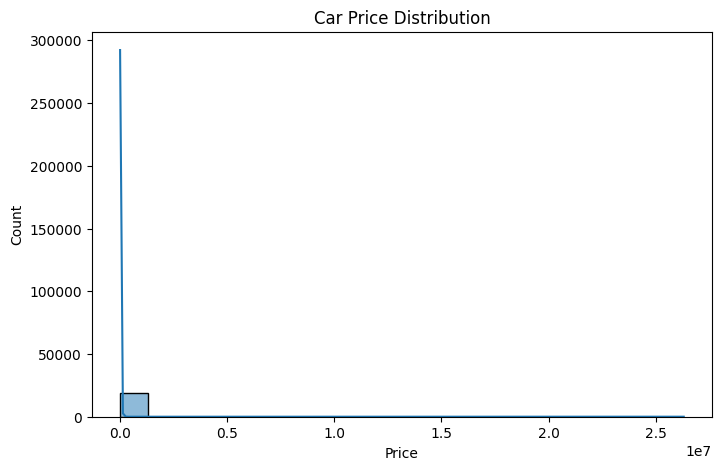

In [ ]:
## histogram for prices
plt.figure(figsize=(8,5))
sns.histplot(data=cars["Price"],bins=20,kde=True)
plt.title("Car Price Distribution")
plt.xlabel("Price")
plt.show()

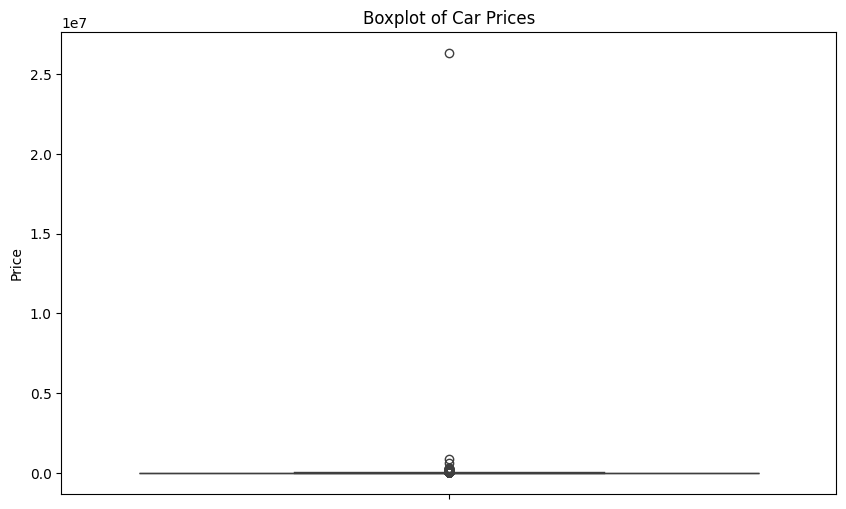

In [ ]:
## boxplot for car prices
plt.figure(figsize=(10, 6))
sns.boxplot(y=cars['Price'])
plt.title('Boxplot of Car Prices')
plt.show()

Text(0.5, 1.0, 'Car Price vs. Age')

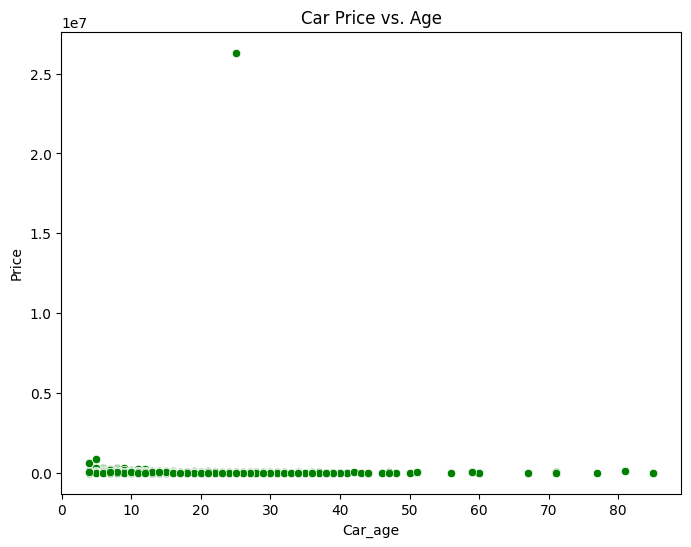

In [ ]:
## scatter plot for Car price vs Age
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cars, x='Car_age', y='Price', color='green')
plt.title('Car Price vs. Age')

The Price column can have very small or extremely large values.
We can filter out values less than 100 and over 1 million.

In [ ]:
# perform log transformation on price
cars['Price'] = np.log1p(cars['Price'])

In [ ]:
print(cars['Price'].min())
print(cars['Price'].max())

0.6931471805599453
17.085364665609077


In [ ]:
## Removing outlier using the IQR method
Q1 = cars['Price'].quantile(0.25)
Q3 = cars['Price'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

## Filter the dataset to drop the outliers
cars = cars[(cars['Price'] >= lower_bound) & (cars['Price'] <= upper_bound)]

In [ ]:
print(cars['Price'].min())
print(cars['Price'].max())

6.55250788703459
12.076094931104949


In [ ]:
#The Price column still has extremely small values.
#We can filter out values less than 100 and over 50000.
#cars = cars[(cars["Price"] > 100) & (cars["Price"] < 50000)]

In [ ]:
print(cars['Price'].min())
print(cars['Price'].max())

6.55250788703459
12.076094931104949


Re-visualize the data

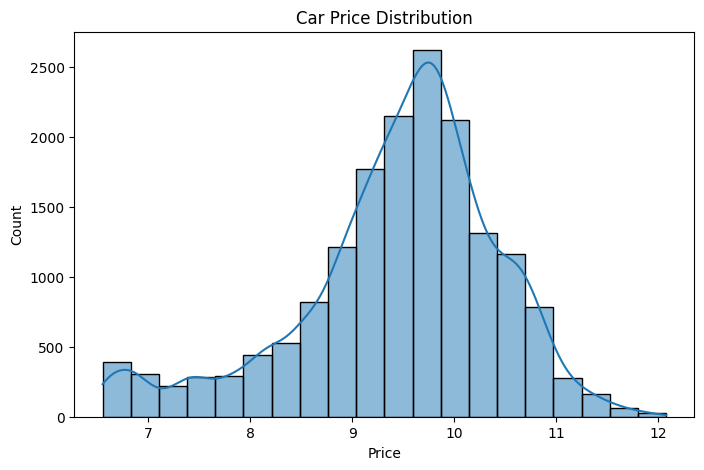

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=cars["Price"],bins=20,kde=True)
plt.title("Car Price Distribution")
plt.xlabel("Price")
plt.show()

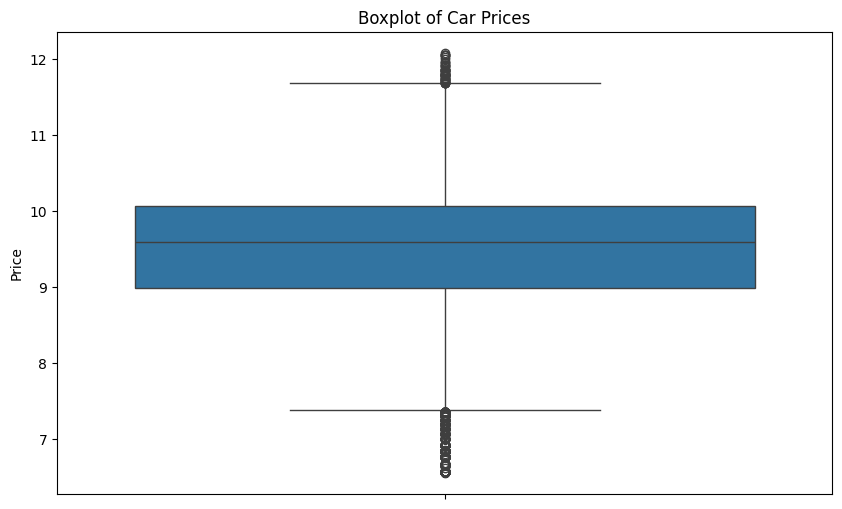

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=cars['Price'])
plt.title('Boxplot of Car Prices')
plt.show()

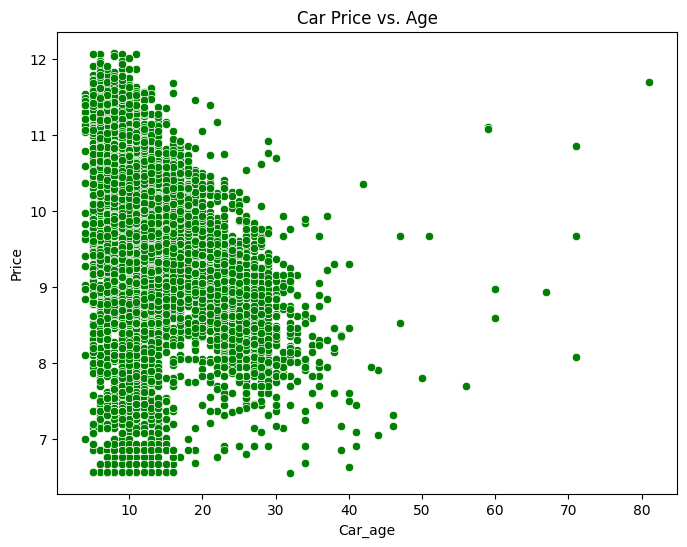

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cars, x='Car_age', y='Price', color='green')
plt.title('Car Price vs. Age')
plt.show()

Using Visualizations to answer some questions.

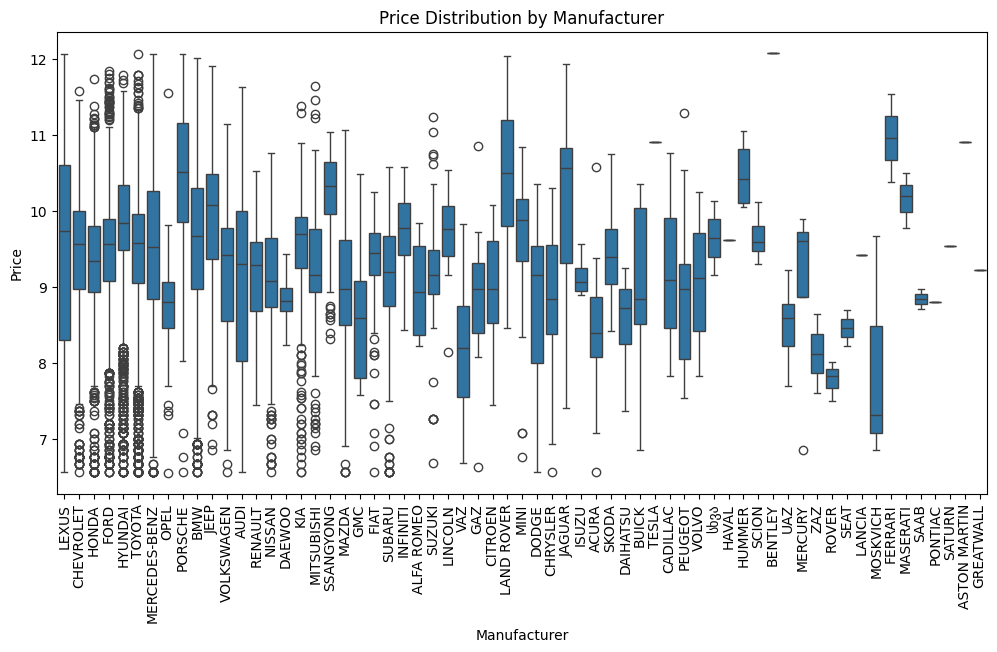

In [ ]:
## What is the distribution of car prices by manufacturer?
plt.figure(figsize=(12, 6))
sns.boxplot(x='Manufacturer', y='Price', data=cars)
plt.xticks(rotation=90)
plt.title('Price Distribution by Manufacturer')
plt.show()

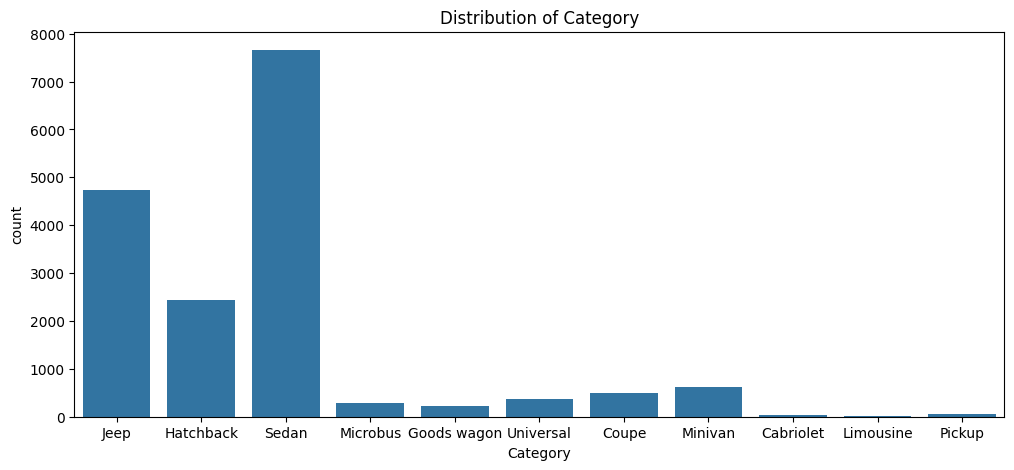

In [ ]:
## What is the most purchased of cars
plt.figure(figsize=(12,5))
sns.countplot(data=cars, x="Category")
plt.title("Distribution of Category")
plt.xlabel("Category")
plt.show()

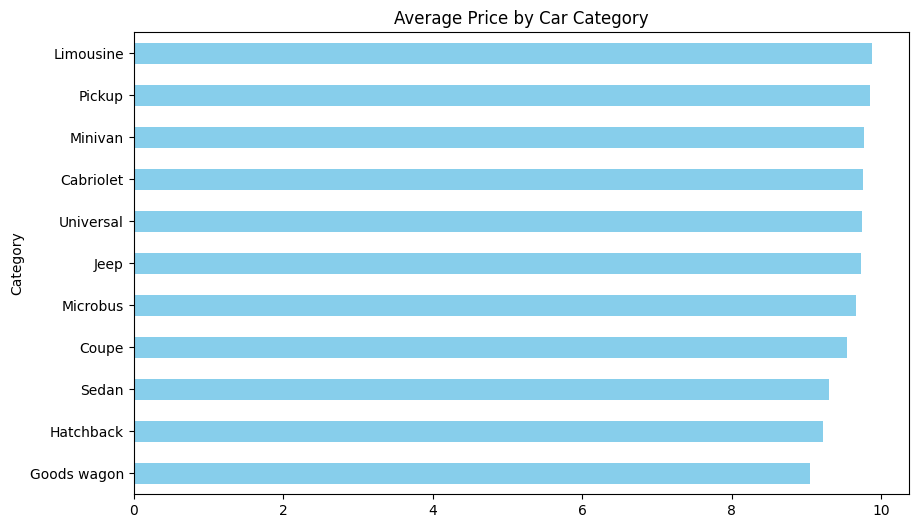

In [ ]:
## What is the average price per car category?
avg_price_category = cars.groupby('Category')['Price'].mean().sort_values()
avg_price_category.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Average Price by Car Category')
plt.show()

Text(0.5, 1.0, 'Price by Drive Wheels')

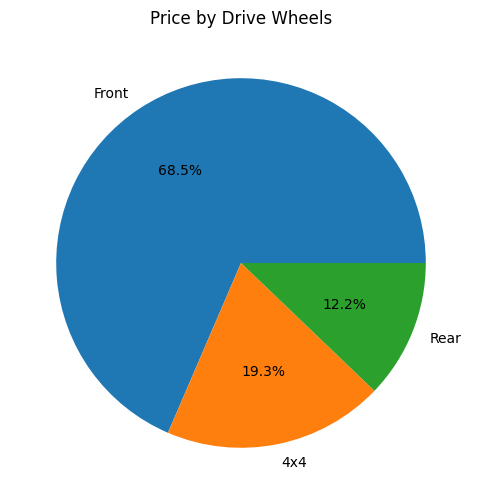

In [ ]:
## What is the most purchased cars by drive wheels?
plt.figure(figsize=(8, 6))
plt.pie(cars['Drive wheels'].value_counts(), labels=cars['Drive wheels'].value_counts().index, autopct='%1.1f%%')
plt.title('Price by Drive Wheels')

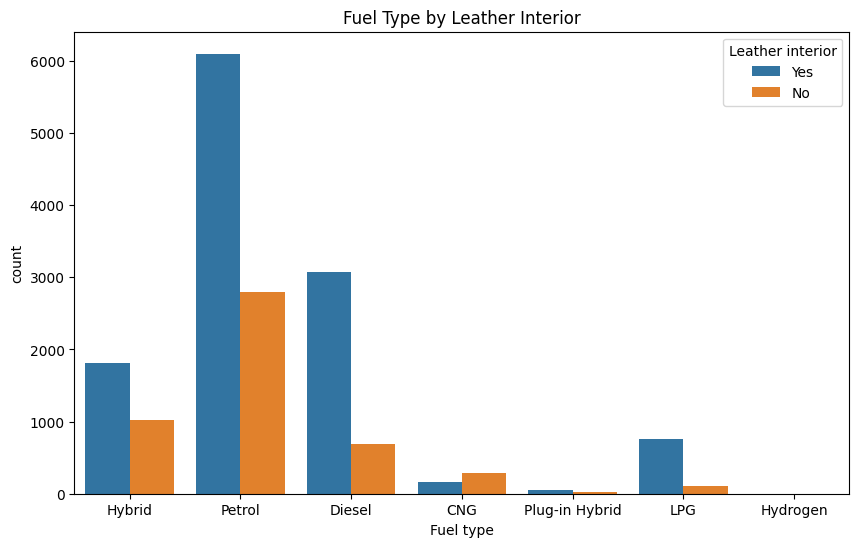

In [ ]:
## Which fuel type is most common among cars with leather interiors?
plt.figure(figsize=(10, 6))
sns.countplot(x='Fuel type', hue='Leather interior', data=cars)
plt.title('Fuel Type by Leather Interior')
plt.show()

<Axes: xlabel='Prod. year', ylabel='Price'>

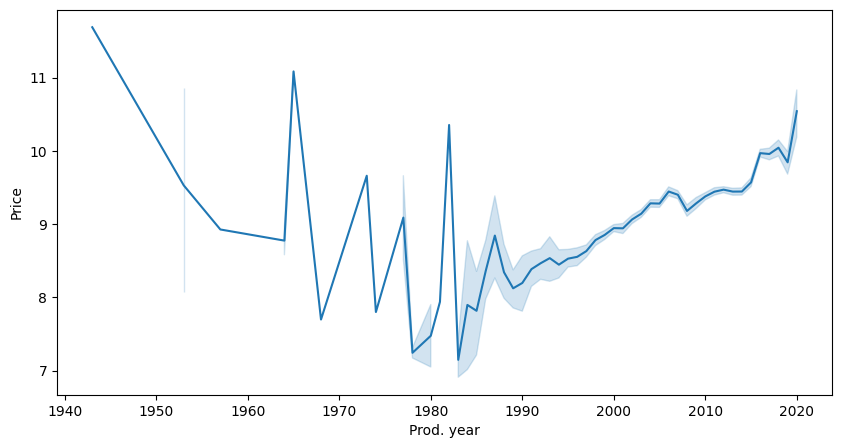

In [ ]:
# line plot for car prices by prod. year
plt.figure(figsize=(10,5))
sns.lineplot(data=cars, x='Prod. year', y='Price')

More Visualizations

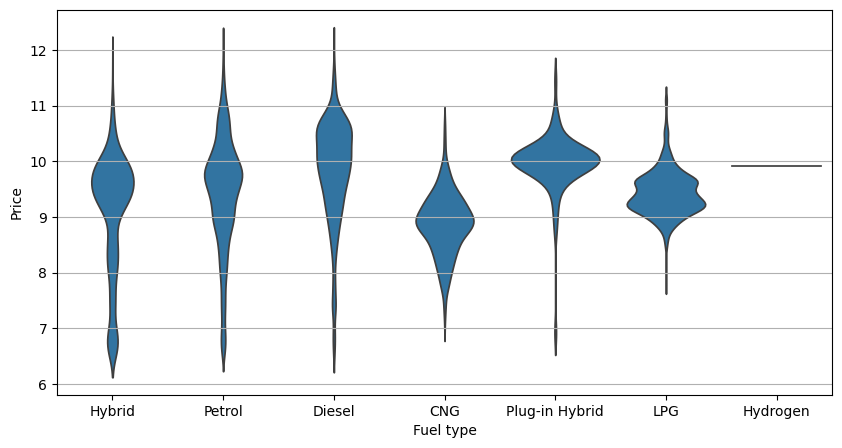

In [ ]:
## violin plot of Price by drive wheels
plt.figure(figsize=(10,5))
sns.violinplot(data=cars, x='Fuel type', y='Price', inner= None)
plt.grid(True, axis='y')

<Axes: xlabel='Drive wheels', ylabel='Price'>

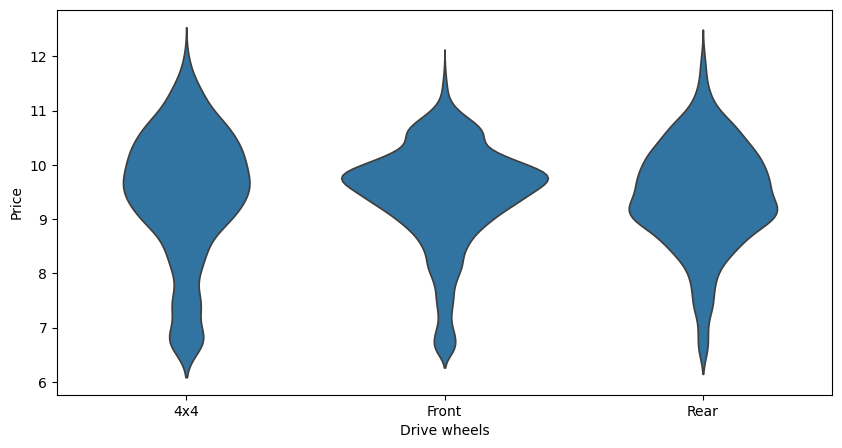

In [ ]:
## violin plot of Price by drive wheels
plt.figure(figsize=(10,5))
sns.violinplot(data=cars, x='Drive wheels', y='Price', inner= None)

CORRELATION MATRIX


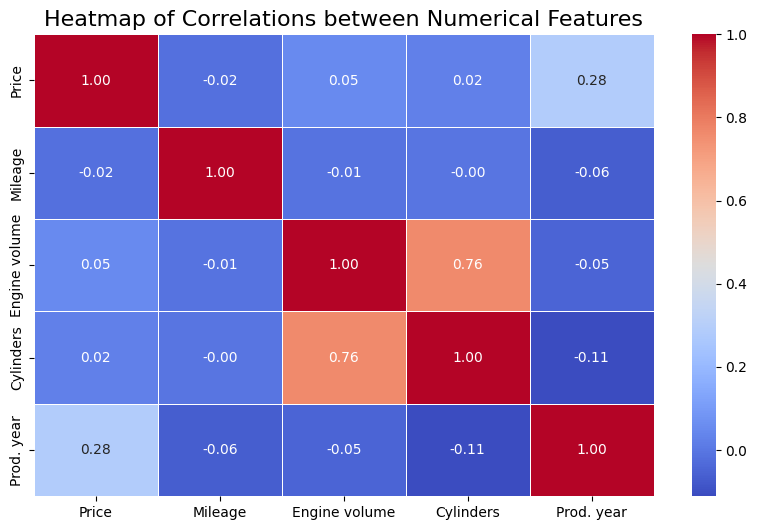

In [ ]:
## Convert 'Engine volume' to string type before using .str.extract
cars['Engine volume'] = cars['Engine volume'].astype(str).str.extract('(\d+\.\d+|\d+)', expand=False)
cars['Engine volume'] = pd.to_numeric(cars['Engine volume'], errors='coerce')

## Select the numerical columns to include in the heatmap
numerical_cols = ['Price', 'Mileage', 'Engine volume', 'Cylinders', 'Prod. year']

corr_matrix = cars[numerical_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlations between Numerical Features', fontsize=16)
plt.show()

Explanation: The correlation matrix reveals which features are most closely associated with price:
'Prod year' and 'Cylinders' are slightyly and positively correlated with 'Price', showing that more cylinder type as well as years tend to affect the cost of cars.

**HYPOTHESIS AND TESTS**




In [ ]:
## Hypothesis 1: Average price differs across fuel types
fuel_groups = [cars[cars['Fuel type'] == f]['Price'] for f in cars['Fuel type'].unique()]
f_stat, p_val = stats.f_oneway(*fuel_groups)
print(f'ANOVA test result - F-statistic: {f_stat}, p-value: {p_val}')

ANOVA test result - F-statistic: 197.4779868447453, p-value: 3.273651732598288e-244


##

In [ ]:
## Hypothesis 2: Cars with leather interior have a higher average price
leather_yes = cars[cars['Leather interior'] == 'Yes']['Price']
leather_no = cars[cars['Leather interior'] == 'No']['Price']
t_stat, p_val = stats.ttest_ind(leather_yes, leather_no)
print(f'T-test result - T-statistic: {t_stat}, p-value: {p_val}')

T-test result - T-statistic: 8.174785903426887, p-value: 3.1719329784309585e-16


##

**INSIGHTS AND RECOMMENDATIONS**

Insights:
- Higher cylinders generally correlate with higher prices, likely due to effficiency.
- Leather interiors appear to increase price, suggesting that they are viewed as a premium feature.
- There is a significant variation in price across fuel types, which could inform pricing strategies.

Recommendations:
- For premium car segments, focus on models with leather interiors and larger engine volumes.
- Consider expanding the selection of fuel-efficient or eco-friendly cars, given distinct pricing tiers by fuel type.


# Predictive Modeling - Linear Regression

In [ ]:
## Selecting relevant features
X = cars[['Prod. year', 'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage', 'Cylinders', 'Gear box type','Drive wheels', 'Doors', 'Wheel']]  # Use loc for label-based indexing
# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Category', 'Leather interior', 'Fuel type', 'Gear box type','Drive wheels', 'Doors', 'Wheel'])
y = cars['Price']

In [ ]:
## Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [ ]:

## Model training
cars_model = LinearRegression()
cars_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
## Predictions and evaluation
y_pred = cars_model.predict(X_test)

In [ ]:
print(y_pred)

[ 9.43001314 10.40310229  9.79734203 ...  9.25643384  9.713084
 10.20188988]


In [ ]:
## Calculate and print metrics suitable for regression
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 0.7725830122298376


In [ ]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.8789670143013546


In [ ]:
r2 = r2_score(y_test, y_pred)

print(f"R-squared (R2): {r2}")

R-squared (R2): 0.2589790279386396


In [ ]:
#performimg a log inverse to convert predcited values back to the original price scale
log_y_pred = cars_model.predict(X_test)

# Inverse the log transformation
y_pred = np.exp(log_y_pred)
print(y_pred)

[12456.69037109 32961.72419435 17985.87550792 ... 10471.72286505
 16532.50956542 26954.07804264]


. Model improvement recommendations
- Consider creating interaction terms for features like Mileage and Engine Volume.
- Use cross-validation for a more robust model performance and hyperparameter tuning.